In [1]:
%matplotlib inline
import cartopy.feature
import cartopy.crs as ccrs
# import cartopy
import matplotlib.pyplot as plt
import numpy as np
import xarray as xr
import sys
sys.path.append("/nfs/see-fs-01_users/eeymr/scripts/hadcm3_deglac_glac1d/glac1d_meltwater/")
import spreading as spreading
import saving as saving
import plotting as plotting
import glac1d_toolbox as tb
import routing as routing
import datetime

## Input Files

### Initial Waterfix

In [2]:
ds_wfix = xr.open_dataset(f"/nfs/annie/eeymr/work/data/Proj_GLAC1D/waterfix/teadv3.qrparam.waterfix.hadcm3.nc")
lon_wfix, lat_wfix = ds_wfix.longitude.values, ds_wfix.latitude.values
ds_wfix_values = saving.kgm2s_to_m3s(ds_wfix.field672.isel(t=0).isel(depth=0).values, lon_wfix, lat_wfix)*10**-6
ds_wfix

<xarray.Dataset>
Dimensions:    (depth: 1, latitude: 144, longitude: 290, t: 1)
Coordinates:
  * longitude  (longitude) float32 0.0 1.25 2.5 3.75 ... 358.75 360.0 361.25
  * latitude   (latitude) float32 -89.375 -88.125 -86.875 ... 88.125 89.375
  * depth      (depth) float32 5.0
  * t          (t) object 1800-12-01 00:00:00
Data variables:
    field672   (t, depth, latitude, longitude) float32 ...
Attributes:
    history:  Fri Jan 24 16:38:00 GMT 2020 - XCONV V1.93 13-October-2015

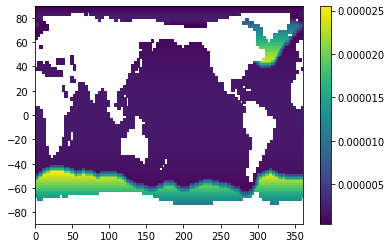

In [3]:
plt.pcolormesh(lon_wfix, lat_wfix, ds_wfix_values)
plt.colorbar()

In [4]:
# Check Flux
print(f"Total flux = {np.nansum(ds_wfix_values)} Sv")

Total flux = 0.11246215750350294 Sv


### Corrected Waterfix

In [5]:
ds_wfix_corrected = xr.open_dataset("/nfs/annie/eeymr/work/outputs/Proj_GLAC1D/corrected_waterfix/teadv3.qrparam.waterfix.hadcm3.corrected.nc")
lon_wfix_corrected, lat_wfix_corrected = ds_wfix.longitude.values, ds_wfix.latitude.values
ds_wfix_corrected_values = saving.kgm2s_to_m3s(ds_wfix_corrected.field672.isel(t=0).isel(depth=0).values, lon_wfix_corrected, lat_wfix_corrected)*10**-6
ds_wfix_corrected

<xarray.Dataset>
Dimensions:    (depth: 1, latitude: 144, longitude: 290, t: 1)
Coordinates:
  * t          (t) object 1800-12-01 00:00:00
  * depth      (depth) float32 5.0
  * latitude   (latitude) float32 -89.375 -88.125 -86.875 ... 88.125 89.375
  * longitude  (longitude) float32 0.0 1.25 2.5 3.75 ... 358.75 360.0 361.25
Data variables:
    field672   (t, depth, latitude, longitude) float32 ...
Attributes:
    title:    Corrected waterfix for teadv3 based on the drift of 21k between...
    history:  Created 2020-02-18 23:00:41.109453 by Yvan Romé

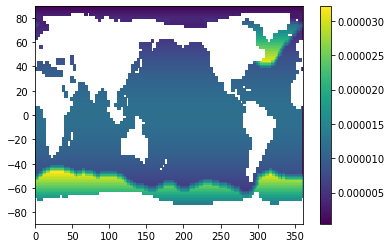

In [6]:
plt.pcolormesh(lon_wfix_corrected, lat_wfix_corrected, ds_wfix_corrected_values)
plt.colorbar()

In [7]:
# Check Flux
print(f"Total flux = {np.nansum(ds_wfix_corrected_values)} Sv")

Total flux = 0.2827753465677626 Sv


## Corrected meltwater file

In [8]:
ds_lgm_corrected = xr.open_dataset("/nfs/annie/eeymr/work/outputs/Proj_GLAC1D/dif_-26_0_sc/teadv3.qrparm.waterfix_GLAC1D_DEGLAC_sc.nc", decode_times=False)
lon_lgm_corrected, lat_lgm_corrected = ds_lgm_corrected.longitude.values, ds_lgm_corrected.latitude.values
ds_lgm_corrected_values = saving.kgm2s_to_m3s(ds_lgm_corrected.discharge.sel(t=-21000).values, lon_lgm_corrected, lat_lgm_corrected)*10**-6
ds_lgm_corrected

<xarray.Dataset>
Dimensions:    (latitude: 144, longitude: 288, t: 261)
Coordinates:
  * t          (t) int64 -26000 -25900 -25800 -25700 -25600 ... -300 -200 -100 0
  * latitude   (latitude) float32 -89.375 -88.125 -86.875 ... 88.125 89.375
  * longitude  (longitude) float32 0.0 1.25 2.5 3.75 ... 356.25 357.5 358.75
Data variables:
    discharge  (t, latitude, longitude) float64 ...
Attributes:
    title:    waterfix for transient GLAC1D last delgaciation HadCM3 project ...
    history:  Created 2020-02-18 23:13:07.892796 by Yvan Romé

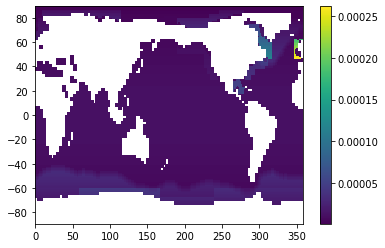

In [9]:
plt.pcolormesh(lon_lgm_corrected, lat_lgm_corrected, ds_lgm_corrected_values)
plt.colorbar()

In [10]:
# Check Flux
print(f"Total flux = {np.nansum(ds_lgm_corrected_values)} Sv")

Total flux = 0.33629951811746667 Sv


### Uncorrected meltwater file

In [11]:
ds_lgm_uncorrected = xr.open_dataset("/nfs/annie/eeymr/work/outputs/Proj_GLAC1D/dif_-26_0_s/teadv3.qrparm.waterfix_GLAC1D_DEGLAC_s.nc", decode_times=False)
lon_lgm_uncorrected, lat_lgm_uncorrected = ds_lgm_uncorrected.longitude.values, ds_lgm_uncorrected.latitude.values
ds_lgm_uncorrected_values = saving.kgm2s_to_m3s(ds_lgm_uncorrected.discharge.sel(t=-21000).values, lon_lgm_uncorrected, lat_lgm_uncorrected)*10**-6
ds_lgm_uncorrected

<xarray.Dataset>
Dimensions:    (latitude: 144, longitude: 288, t: 261)
Coordinates:
  * t          (t) int64 -26000 -25900 -25800 -25700 -25600 ... -300 -200 -100 0
  * latitude   (latitude) float32 -89.375 -88.125 -86.875 ... 88.125 89.375
  * longitude  (longitude) float32 0.0 1.25 2.5 3.75 ... 356.25 357.5 358.75
Data variables:
    discharge  (t, latitude, longitude) float64 ...
Attributes:
    title:    waterfix for transient GLAC1D last delgaciation HadCM3 project ...
    history:  Created 2020-01-30 10:18:40.119769 by Yvan Romé

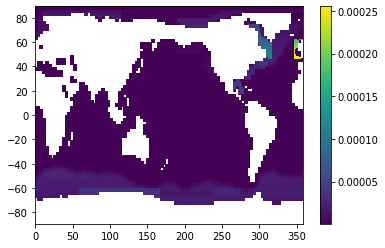

In [12]:
plt.pcolormesh(lon_lgm_uncorrected, lat_lgm_uncorrected, ds_lgm_uncorrected_values)
plt.colorbar()

In [13]:
# Check Flux
print(f"Total flux = {np.nansum(ds_lgm_uncorrected_values)} Sv")

Total flux = 0.164803598573594 Sv


## Saving

### Without drift correction

In [14]:
# waterfix_sav = np.nanmean([ds_lgm_uncorrected.discharge.sel(t=-21200).values,
#                          ds_lgm_uncorrected.discharge.sel(t=-21100).values,
#                          ds_lgm_uncorrected.discharge.sel(t=-21000).values,
#                          ds_lgm_uncorrected.discharge.sel(t=-20900).values,
#                          ds_lgm_uncorrected.discharge.sel(t=-20800).values], axis=0)
waterfix_sav = ds_lgm_uncorrected.discharge.sel(t=-21000).values
new_waterfix = np.zeros(ds_wfix.field672.values.shape)
new_waterfix[0,0,:,:-2] = waterfix_sav 
new_waterfix[0,0,:,-2:] = waterfix_sav[:,:2]

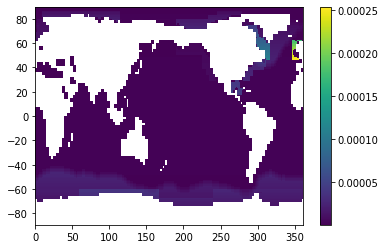

In [15]:
longitude, latitude, t, depth = ds_wfix.longitude.values, ds_wfix.latitude.values, ds_wfix.t.values, ds_wfix.depth.values

plt.pcolormesh(longitude, latitude, saving.kgm2s_to_m3s(new_waterfix[0,0], longitude, latitude)*10**-6)
plt.colorbar()

In [16]:
# Check Flux
print(f"Total flux = {np.nansum(new_waterfix)} Sv")

Total flux = 0.019287957872545506 Sv


In [17]:
ds = xr.Dataset({'field672': (('t', 'depth', 'latitude', 'longitude'), new_waterfix)},
                    coords={'t': t, 'depth': depth, 'latitude': latitude, 'longitude': longitude})

ds['t'].attrs['long_name'] = 'time'

ds['depth'].attrs['long_name'] = 'depth'

ds['field672'].attrs['units'] = 'kg m-2 s-1'
ds['field672'].attrs['longname'] = 'P-E FLUX CORRECTION       KG/M2/S  A'

ds['longitude'].attrs['long_name'] = 'longitude'
ds['longitude'].attrs['actual_range'] = '0., 359.'
ds['longitude'].attrs['axis'] = 'X'
ds['longitude'].attrs['units'] = 'degrees_east'
ds['longitude'].attrs['modulo'] = '360'
ds['longitude'].attrs['topology'] = 'circular'

ds['latitude'].attrs['long_name'] = 'latitude'
ds['latitude'].attrs['actual_range'] = '-89.5, 89.5'
ds['latitude'].attrs['axis'] = 'y'
ds['latitude'].attrs['units'] = 'degrees_north'

ds.attrs['title'] = \
    f"Corrected waterfix based on GLAC-1D 21k meltwater pattern. No drift correction."
ds.attrs['history'] = f"Created on {datetime.datetime.now()} by Yvan Romé (University of Leeds)"

ds

<xarray.Dataset>
Dimensions:    (depth: 1, latitude: 144, longitude: 290, t: 1)
Coordinates:
  * t          (t) object 1800-12-01 00:00:00
  * depth      (depth) float32 5.0
  * latitude   (latitude) float32 -89.375 -88.125 -86.875 ... 88.125 89.375
  * longitude  (longitude) float32 0.0 1.25 2.5 3.75 ... 358.75 360.0 361.25
Data variables:
    field672   (t, depth, latitude, longitude) float64 nan nan nan ... nan nan
Attributes:
    title:    Corrected waterfix based on GLAC-1D 21k meltwater pattern. No d...
    history:  Created on 2020-05-06 11:47:33.326552 by Yvan Romé (University ...

In [18]:
sav_path = "qrparam.21k.glac.noc.hcm3.nc"
ds.to_netcdf(sav_path)

In [19]:
# Last check flux
print(np.nansum(ds_wfix.field672.values))
print(np.nansum(ds.field672.values))

0.011599329
0.019287957872545506


### With drift correction

In [20]:
# waterfix_sav = np.nanmean([ds_lgm_uncorrected.discharge.sel(t=-21200).values,
#                          ds_lgm_uncorrected.discharge.sel(t=-21100).values,
#                          ds_lgm_uncorrected.discharge.sel(t=-21000).values,
#                          ds_lgm_uncorrected.discharge.sel(t=-20900).values,
#                          ds_lgm_uncorrected.discharge.sel(t=-20800).values], axis=0)
waterfix_sav = ds_lgm_corrected.discharge.sel(t=-21000).values
new_waterfix = np.zeros(ds_wfix.field672.values.shape)
new_waterfix[0,0,:,:-2] = waterfix_sav 
new_waterfix[0,0,:,-2:] = waterfix_sav[:,:2]

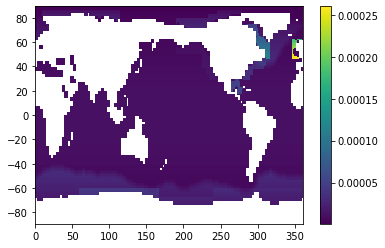

In [21]:
longitude, latitude, t, depth = ds_wfix.longitude.values, ds_wfix.latitude.values, ds_wfix.t.values, ds_wfix.depth.values

plt.pcolormesh(longitude, latitude, saving.kgm2s_to_m3s(new_waterfix[0,0], longitude, latitude)*10**-6)
plt.colorbar()

In [22]:
# Check Flux
print(f"Total flux = {np.nansum(new_waterfix)} Sv")

Total flux = 0.03168328456607722 Sv


In [23]:
ds = xr.Dataset({'field672': (('t', 'depth', 'latitude', 'longitude'), new_waterfix)},
                    coords={'t': t, 'depth': depth, 'latitude': latitude, 'longitude': longitude})

ds['t'].attrs['long_name'] = 'time'

ds['depth'].attrs['long_name'] = 'depth'

ds['field672'].attrs['units'] = 'kg m-2 s-1'
ds['field672'].attrs['longname'] = 'P-E FLUX CORRECTION       KG/M2/S  A'

ds['longitude'].attrs['long_name'] = 'longitude'
ds['longitude'].attrs['actual_range'] = '0., 359.'
ds['longitude'].attrs['axis'] = 'X'
ds['longitude'].attrs['units'] = 'degrees_east'
ds['longitude'].attrs['modulo'] = '360'
ds['longitude'].attrs['topology'] = 'circular'

ds['latitude'].attrs['long_name'] = 'latitude'
ds['latitude'].attrs['actual_range'] = '-89.5, 89.5'
ds['latitude'].attrs['axis'] = 'y'
ds['latitude'].attrs['units'] = 'degrees_north'

ds.attrs['title'] = \
    f"Corrected waterfix based on GLAC-1D 21k meltwater pattern. Drift correction."
ds.attrs['history'] = f"Created on {datetime.datetime.now()} by Yvan Romé (University of Leeds)"

ds

<xarray.Dataset>
Dimensions:    (depth: 1, latitude: 144, longitude: 290, t: 1)
Coordinates:
  * t          (t) object 1800-12-01 00:00:00
  * depth      (depth) float32 5.0
  * latitude   (latitude) float32 -89.375 -88.125 -86.875 ... 88.125 89.375
  * longitude  (longitude) float32 0.0 1.25 2.5 3.75 ... 358.75 360.0 361.25
Data variables:
    field672   (t, depth, latitude, longitude) float64 nan nan nan ... nan nan
Attributes:
    title:    Corrected waterfix based on GLAC-1D 21k meltwater pattern. Drif...
    history:  Created on 2020-05-06 11:47:33.858595 by Yvan Romé (University ...

In [24]:
sav_path = "qrparam.21k.glac.c.hcm3.nc"
ds.to_netcdf(sav_path)

In [25]:
# Last check flux
print(np.nansum(ds_wfix.field672.values))
print(np.nansum(ds.field672.values))

0.011599329
0.03168328456607722
